In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
import os
import numpy as np
from load_gan import load_gan
from load_cases import load_cases, load_save_name
from train_gan import train_gan
from evaluation import evaluation
from keras.datasets import mnist

os.environ["KERAS_BACKEND"] = "tensorflow"

In [23]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5)/127.5
x_test = (x_test.astype(np.float32) - 127.5)/127.5
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [24]:
epochs = 4
randomDim = 50
batchSize = 128
examples = 100
cases = load_cases(loss_bases=["Wasserstein"],
                   link_modes=["alpha"],
                   alphas=[1.],
                   offsets=[0.])

In [25]:
for case in cases:
    print(case)
    save_name = load_save_name(case)
    generator, discriminator, gan = load_gan(offset=case["offset"],
                                             alpha=case["alpha"],
                                             randomDim=randomDim,
                                             link_mode=case["link_mode"],
                                             power=case["power"],
                                             mult=case["mult"],
                                             sqrt=case["sqrt"],
                                             loss_base=case["loss_base"])

    to_be_trusted, disc_loss, gen_loss, hurting = train_gan(disc=discriminator,
                                                            gen=generator,
                                                            gan=gan,
                                                            x_train=x_train,
                                                            epochs=epochs,
                                                            batch_size=batchSize,
                                                            d_loss_limit=0.05,
                                                            randomDim=randomDim)
    if to_be_trusted:
        location = "results/" + case["loss_base"] + "/" + case["link_mode"] + "/" + save_name
        evaluation(generator=generator,
                   randomDim=randomDim,
                   location=location,
                   examples=examples, title=save_name,
                   hurting=hurting, gen_loss=gen_loss, disc_loss=disc_loss, x_test=x_test[:examples*examples])

print("LETS GO TO SLEEP \n "*10)

{'link_mode': 'alpha', 'loss_base': 'Wasserstein', 'alpha': 1.0, 'offset': 0.0, 'power': None, 'mult': None, 'sqrt': None}


/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=50, kernel_initializer=<keras.ini..., kernel_constraint=<weight_cl...)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_constraint=<weight_cl...)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_constraint=<weight_cl...)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, activation="tanh", kernel_constraint=<weight_cl...)`
  activation=activation))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=784, kernel_initializer=<keras.ini..., kernel_con

LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 


In [26]:
noise = np.random.normal(0, 1, size=[100, randomDim])

In [27]:
images = generator.predict(noise)

In [28]:
discriminator.predict(images)

array([[-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-0.9999999],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.       ],
       [-1.  

In [48]:
discriminator.evaluate(x_test[:100], np.ones(100))

100/100 [==============================] - 0s 98us/step


1.0

In [45]:
gan.evaluate(noise, np.zeros(100))

100/100 [==============================] - 0s 175us/step


0.949999988079071

In [43]:
x_train[:100]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [31]:
images

array([[-0.9075661 , -0.7712361 , -0.792596  , ..., -0.59249264,
        -0.7515513 , -0.5787167 ],
       [-0.89373386, -0.7755038 , -0.83128566, ..., -0.5277816 ,
        -0.7463821 , -0.58656675],
       [-0.93577105, -0.8056201 , -0.864388  , ..., -0.64591795,
        -0.8082505 , -0.662701  ],
       ...,
       [-0.9273984 , -0.8238669 , -0.850543  , ..., -0.6341044 ,
        -0.8051476 , -0.63300604],
       [-0.93746316, -0.8171163 , -0.8546486 , ..., -0.67114455,
        -0.776164  , -0.6097961 ],
       [-0.9493212 , -0.8194054 , -0.8778476 , ..., -0.7153786 ,
        -0.8230099 , -0.6747598 ]], dtype=float32)

In [32]:
from matplotlib import pyplot as plt

In [33]:
def plotImages(generatedImages, dim=(10,10), title="title"):
    plt.figure(figsize=dim)
    plt.title(title)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.close()

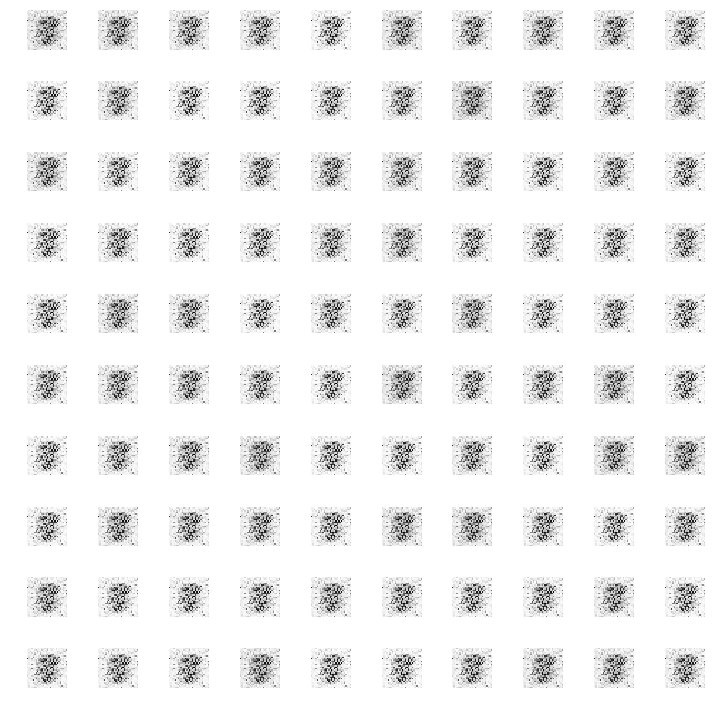

In [34]:
plotImages(images.reshape(100, 28,28))

In [35]:
batch_size = 10

In [36]:
yDis = np.zeros(2 * batch_size)
yDis[:batch_size] = 1

In [37]:
yDis

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [38]:
disc_loss

[0.46354006306451356,
 0.47499995404838496,
 0.4749999544941462,
 0.4749999446237189]

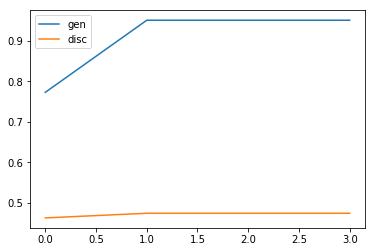

In [39]:
plt.plot(gen_loss, label="gen")
plt.plot(disc_loss, label="disc")
plt.legend()
plt.show()

In [40]:
gen_loss

[0.7725996295085702,
 0.9499998688697815,
 0.9499998688697815,
 0.9499998688697815]